<a href="https://colab.research.google.com/github/v-3sg/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DS Week 1/sales_predictions.csv"


In [2]:
df = pd.read_csv(filename)

1 - Explore the data - what do you need to do to clean this data? Clean it!



Data Dictionary for this dataset:

Variable Name	Description

Item_Identifier	Unique product ID

Item_Weight	Weight of product

Item_Fat_Content	Whether the product is low fat or regular

Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

Item_Type	The category to which the product belongs

Item_MRP	Maximum Retail Price (list price) of the product

Outlet_Identifier	Unique store ID

Outlet_Establishment_Year	The year in which store was established

Outlet_Size	The size of the store in terms of ground area covered

Outlet_Location_Type	The type of area in which the store is located

Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.


**--> Based on the Data Dictionary, potential irrelevant columns include:**

**Outlet_Establishment_Year**

**Outlet_Size**

**Outlet_Location**

**Outlet_Type**

**... However, there is the possibility that these columns represent variables that may affect whether a certain food item is purchased, e.g., an outlet of a certain size/type/age may nudge a customer to buy an item. My initial thought is not to drop any columns.**


In [3]:
#check for duplicates
df.duplicated().any()

False

**--> No duplicates present**

2- Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

In [4]:
#explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#check for NaNs/nulls
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**--> Confirmed count of null values for Item_Weight (1463) and Outlet_Size (2410)**

3 - What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
#explore descriptive statistics of data
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


**--> Summary of statistics:**

**There seems to be a weight outlier (min of Item_Weight = 4.555). Note Item_Weight data may be skewed due to presence of NaN values for this column.**

**Low Fat items seemed to be the most bought (Item_Fat_Content frequency = 5089)**

**Average price of purchased items was about 140.99 (see Item_MRP). Possible outliers for min value and max value.**

**For Outlet_Size, frequency of Medium was highest (2793); however, this may be skewed due to presence of NaN values for this column.**

**For Outlet_Location_Type, frequency of Tier 3 was highest (3350).**

**For Outlet_Type, frequency of Supermarket Type 1 was highest (5577).**

**For Item_Outlet_Sales, there seems to be outliers with min at 33.29 and max at 13086.96**




In [9]:
#look at sample of null values
null_df = df[df.isnull().any(axis=1)]
null_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


**--> Cannot determine any pattern with the NaN values**

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

In [10]:
import matplotlib.pyplot as plot
import seaborn as sns

**--> Histograms**

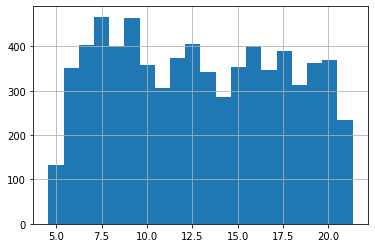

In [11]:
#histogram
#item weight

df['Item_Weight'].hist(bins = 20)

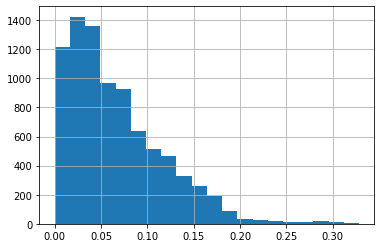

In [12]:
#histogram
#item visibility

df['Item_Visibility'].hist(bins = 20)

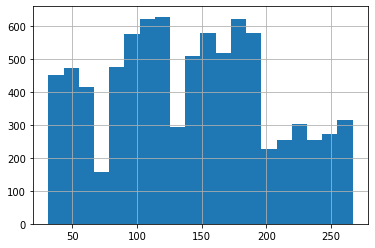

In [13]:
#histogram
#item MRP

df['Item_MRP'].hist(bins = 20)

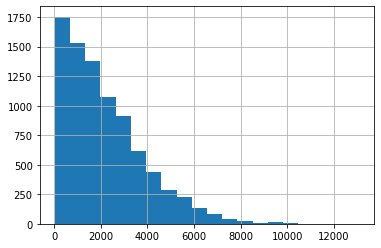

In [14]:
#histogram
#item outlet sales

df['Item_Outlet_Sales'].hist(bins = 20)

**--> Bar Chart (Just Curious)**

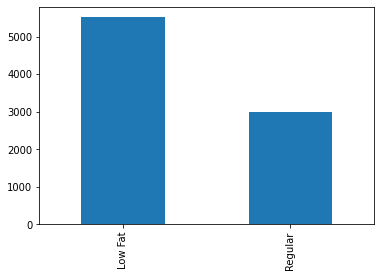

In [15]:
#columns below are categorical and would be better suited with bar chart
#item fat content
#outlet size
#outlet location type
#outlet type

#initial bar chart shows stray values "low fat", "LF", "reg"
#rename values then redo histogram
df = df.replace(['low fat','LF'],'Low Fat')
df = df.replace(['reg'], 'Regular')

#out of curiosity...
#bar chart
#item fat content
df['Item_Fat_Content'].value_counts().plot(kind = 'bar')

**--> Boxplots**

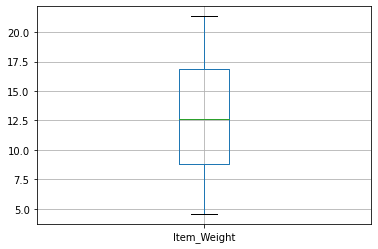

In [16]:
#boxplot
#item weight

df.boxplot(column = 'Item_Weight');

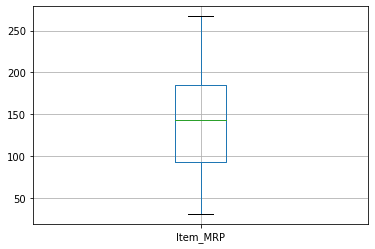

In [17]:
#boxplot
#item MRP

df.boxplot(column = 'Item_MRP');

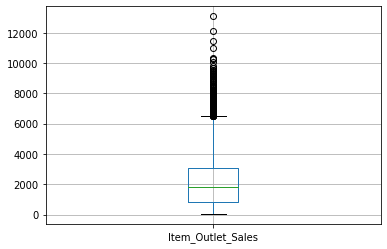

In [18]:
#boxplot
#item outlet sales

df.boxplot(column = 'Item_Outlet_Sales');

**--> Heatmap**

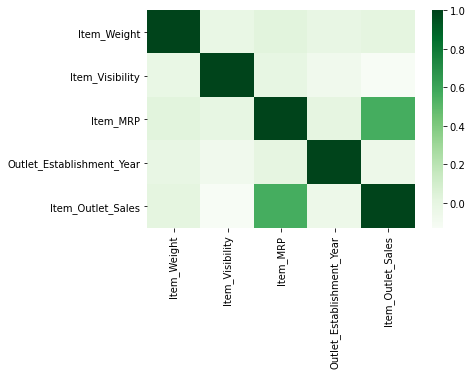

In [19]:
#heatmap
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');

In [20]:
#checking correlation between item outlet sales and item MRP
outlet_sales_by_MRP = df['Item_Outlet_Sales'].corr(df['Item_MRP'])
outlet_sales_by_MRP

0.5675744466569195

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

**--> Based on the data exploration and initial visualizations in Part 3, I want to follow up with the Item Fat Content column values of Low Fat and Regular and tease out any possible correlations.** 

In [21]:
#grouping low fat content by item type
#get count for items sold
low_fat_df = df[(df['Item_Fat_Content'] == 'Low Fat')]
low_fat_df = low_fat_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].count().reset_index()
low_fat_df

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Low Fat,Baking Goods,329
1,Low Fat,Breads,140
2,Low Fat,Breakfast,41
3,Low Fat,Canned,341
4,Low Fat,Dairy,418
5,Low Fat,Frozen Foods,450
6,Low Fat,Fruits and Vegetables,630
7,Low Fat,Hard Drinks,214
8,Low Fat,Health and Hygiene,520
9,Low Fat,Household,910


In [22]:
#grouping regular (fat) content by item type
#get count for items sold
regular_df = df[(df['Item_Fat_Content'] == 'Regular')]
regular_df = regular_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].count().reset_index()
regular_df

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Regular,Baking Goods,319
1,Regular,Breads,111
2,Regular,Breakfast,69
3,Regular,Canned,308
4,Regular,Dairy,264
5,Regular,Frozen Foods,406
6,Regular,Fruits and Vegetables,602
7,Regular,Meat,255
8,Regular,Seafood,27
9,Regular,Snack Foods,508


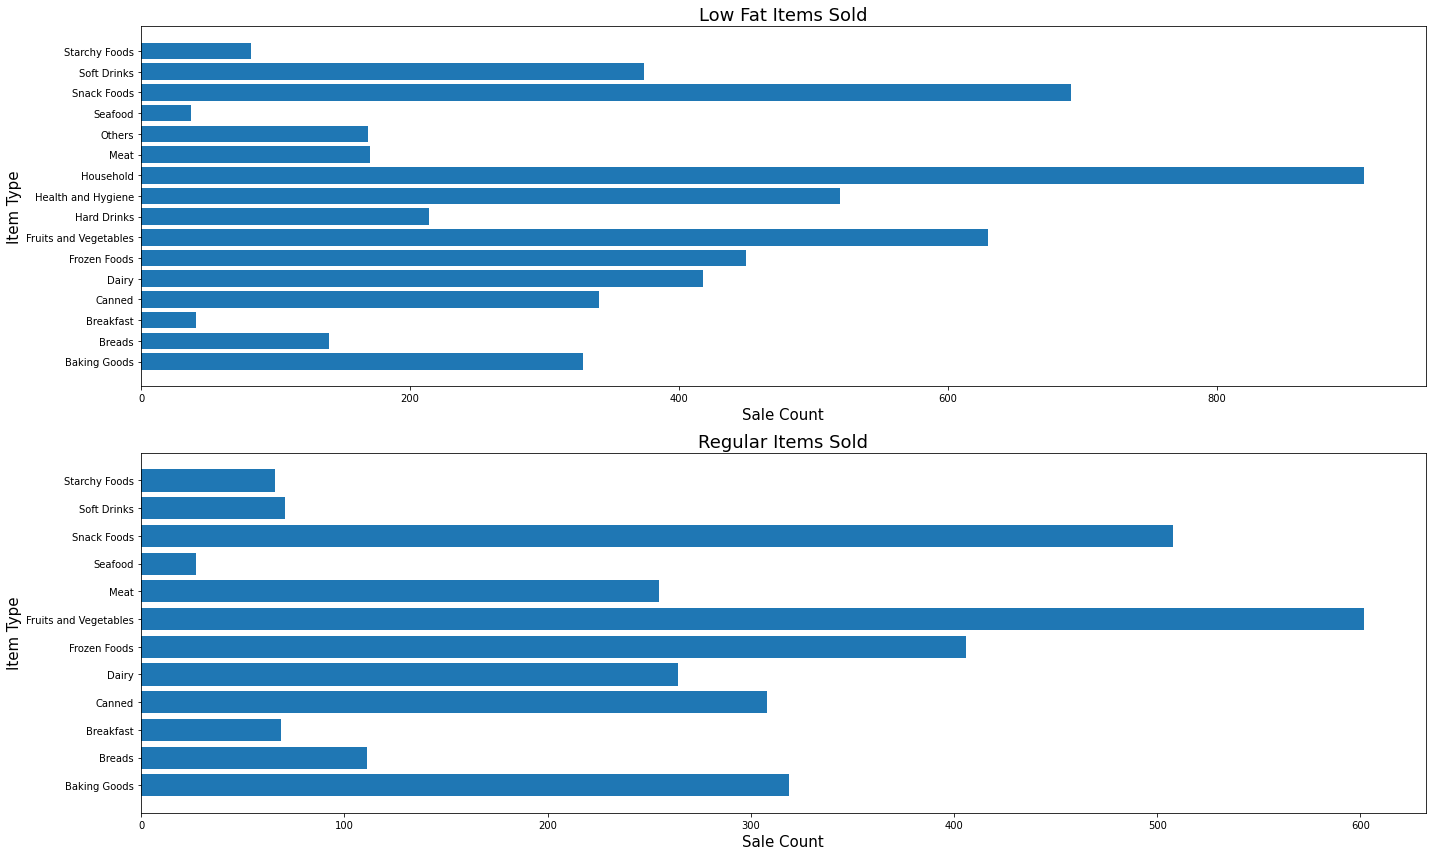

In [23]:
plot.figure(figsize=(20,12))
# bar plot with matplotlib

plot.subplot(2, 1, 1)
plot.barh('Item_Type', 'Item_Outlet_Sales', data=low_fat_df,  label = 'Low Fat Sale Count');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Low Fat Items Sold', size=18);

plot.subplot(2, 1, 2)
plot.barh('Item_Type', 'Item_Outlet_Sales', data=regular_df,  label = 'Regular Sale Count');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Regular Items Sold', size=18);

plot.tight_layout()

**--> Interpretation:**

**Top 3 Low Fat items sold are Household, Snack Foods, and Fruits and Vegetables**

**Top 3 Regular items sold are Fruits and Vegetables, Snack Foods, and Frozen Foods**

**--> I'll use Low Fat and Regular to filter out another column variable...**

In [24]:
#get count of outlet types
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

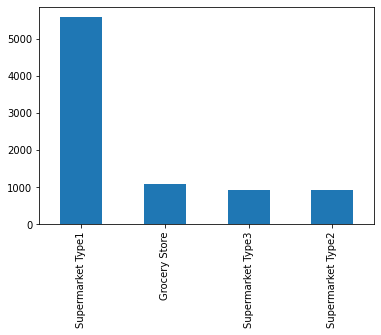

In [25]:
#visualize
df['Outlet_Type'].value_counts().plot(kind = 'bar');

In [26]:
#group by low fat content by outlet type and get count
lf_outlet_df = df[(df['Item_Fat_Content'] == 'Low Fat')]
lf_outlet_df = lf_outlet_df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].count().reset_index()
lf_outlet_df

,Item_Fat_Content,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Grocery Store,705
1,Low Fat,Supermarket Type1,3609
2,Low Fat,Supermarket Type2,598
3,Low Fat,Supermarket Type3,605


In [27]:
#group by regular (fat) content by outlet type and get count
reg_outlet_df = df[(df['Item_Fat_Content'] == 'Regular')]
reg_outlet_df = reg_outlet_df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].count().reset_index()
reg_outlet_df

,Item_Fat_Content,Outlet_Type,Item_Outlet_Sales
0,Regular,Grocery Store,378
1,Regular,Supermarket Type1,1968
2,Regular,Supermarket Type2,330
3,Regular,Supermarket Type3,330


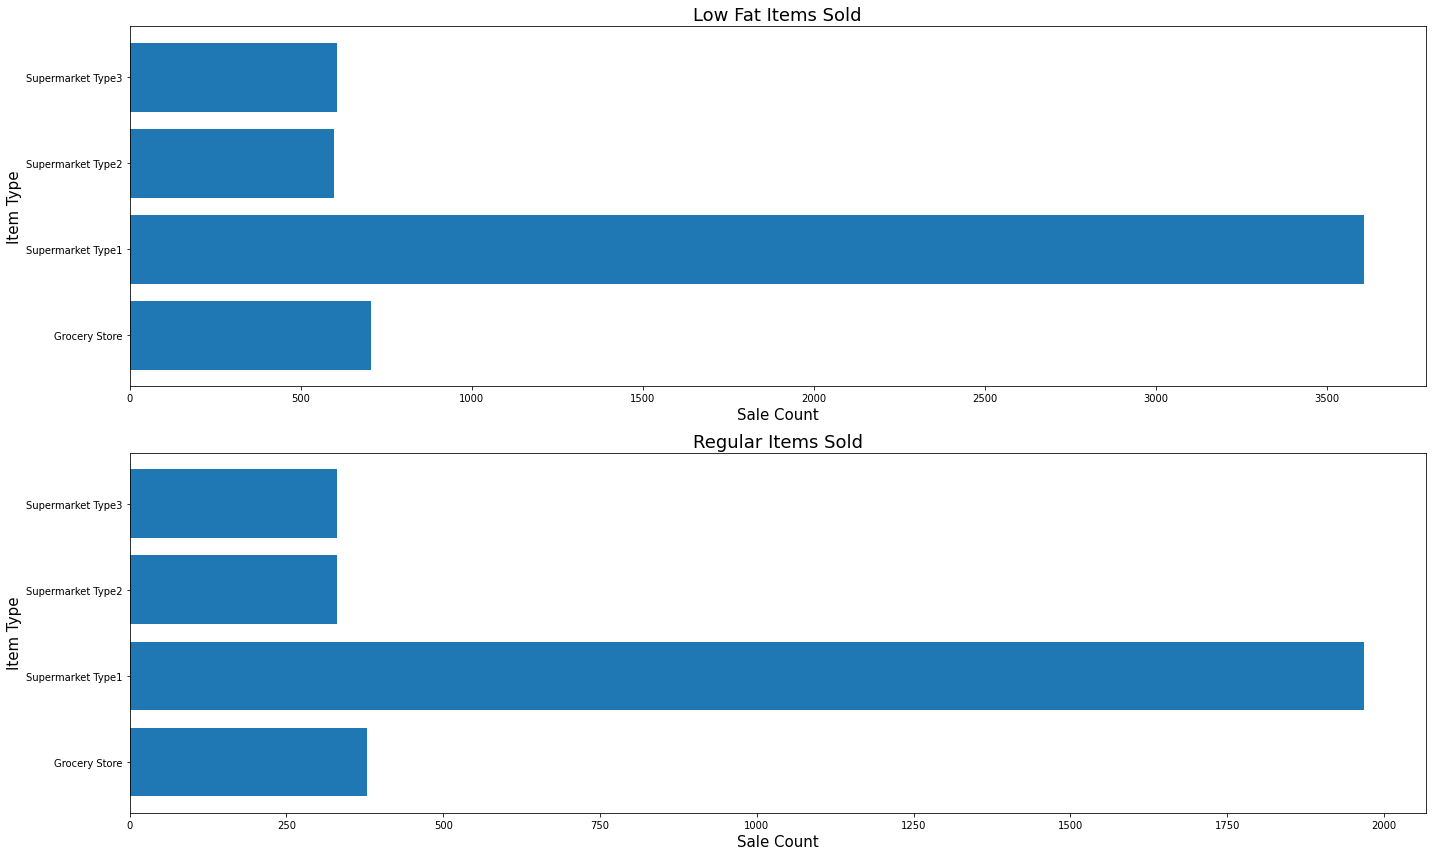

In [28]:
plot.figure(figsize=(20,12))
# bar plot with matplotlib

plot.subplot(2, 1, 1)
plot.barh('Outlet_Type', 'Item_Outlet_Sales', data=lf_outlet_df,  label = 'Low Fat Sale Count by Outlet Type');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Low Fat Items Sold', size=18);

plot.subplot(2, 1, 2)
plot.barh('Outlet_Type', 'Item_Outlet_Sales', data=reg_outlet_df,  label = 'Regular Sale Count by Outlet Type');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Regular Items Sold', size=18);

plot.tight_layout()

**--> Interpretation:**

**Supermarket Type1 overwhelmingly had the highest amount of Low Fat sales**

**Supermarket Type1 overwhelmingly had the highest amount of Regular sales**


For Part 5, your task is to use Linear Regression to create and evaluate a model to predict sales:

Use the data you have cleaned in previous weeks. 



Spend time transforming your categorical variables into numbers and use dummy encoding where appropriate.

In [29]:
#loose ends
#replace null values in Item_Weight
#with mean value of Item_Weight
mean_value_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=mean_value_weight, inplace=True)


In [30]:
#remaining field with null values (Outlet_Size)
#will be transformed as part of dummy encoding
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
#get values for the categorical variables
print(df['Item_Identifier'].value_counts())
print(df['Item_Fat_Content'].value_counts())
print(df['Item_Type'].value_counts())
print(df['Outlet_Identifier'].value_counts())
print(df['Outlet_Size'].value_counts())
print(df['Outlet_Location_Type'].value_counts())
print(df['Outlet_Type'].value_counts())

FDG33    10
FDW13    10
NCL31     9
NCB18     9
NCQ06     9
         ..
DRF48     1
FDC23     1
FDQ60     1
FDT35     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Siz

In [33]:
#transform categorical variables into numbers
#use dummy encoding where appropriate

#dummy encode 'Item_Fat_Content'
encoded_fat = pd.get_dummies(df['Item_Fat_Content'])
encoded_fat.head()

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [34]:
#dummy encode 'Item_Identifier'
encoded_item_id = pd.get_dummies(df['Item_Identifier'])
encoded_item_id.head(5)

,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,DRC13,DRC24,DRC25,DRC27,DRC36,DRC49,DRD01,DRD12,DRD13,DRD15,DRD24,DRD25,DRD27,DRD37,DRD49,DRD60,DRE01,DRE03,DRE12,DRE13,DRE15,DRE25,DRE27,DRE37,DRE48,DRE49,DRE60,DRF01,DRF03,DRF13,...,NCW05,NCW06,NCW17,NCW18,NCW29,NCW30,NCW41,NCW42,NCW53,NCW54,NCX05,NCX06,NCX17,NCX18,NCX29,NCX30,NCX41,NCX42,NCX53,NCX54,NCY05,NCY06,NCY17,NCY18,NCY29,NCY30,NCY41,NCY42,NCY53,NCY54,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#dummy encode 'Item_Type'
encoded_type = pd.get_dummies(df['Item_Type'])
encoded_type.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [36]:
#dummy encode 'Outlet_Identifier'
encoded_outlet_id = pd.get_dummies(df['Outlet_Identifier'])
encoded_outlet_id.head()

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [37]:
#dummy encode 'Outlet_Size'
encoded_outlet_size = pd.get_dummies(df['Outlet_Size'])
encoded_outlet_size.head()

,High,Medium,Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0


In [38]:
#dummy encode 'Outlet_Location_Type'
encoded_outlet_loctype = pd.get_dummies(df['Outlet_Location_Type'])
encoded_outlet_loctype.head()

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [39]:
#dummy encode 'Outlet_Type'
encoded_outlet_type = pd.get_dummies(df['Outlet_Type'])
encoded_outlet_type.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [40]:
#drop categorical columns from original df
dropped_df = df.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1)
dropped_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [41]:
#split original df into 5 dfs
weight_df = df[['Item_Weight']]
vis_df = df[['Item_Visibility']]
MRP_df = df[['Item_MRP']]
year_df = df[['Outlet_Establishment_Year']]
sales_df = df[['Item_Outlet_Sales']]

In [42]:
#join encoded dfs with child dfs of original df
new_df = encoded_outlet_type.join(sales_df)
new_df = encoded_outlet_loctype.join(new_df)
new_df = encoded_outlet_size.join(new_df)
new_df = year_df.join(new_df)
new_df = encoded_outlet_id.join(new_df)
new_df = MRP_df.join(new_df)
new_df = encoded_type.join(new_df)
new_df = vis_df.join(new_df)
new_df = encoded_fat.join(new_df)
new_df = weight_df.join(new_df)
new_df = encoded_item_id.join(new_df)
new_df.head()

,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,DRC13,DRC24,DRC25,DRC27,DRC36,DRC49,DRD01,DRD12,DRD13,DRD15,DRD24,DRD25,DRD27,DRD37,DRD49,DRD60,DRE01,DRE03,DRE12,DRE13,DRE15,DRE25,DRE27,DRE37,DRE48,DRE49,DRE60,DRF01,DRF03,DRF13,...,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016047,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,249.8092,0,0,0,0,0,0,0,0,0,1,1999,0,1,0,1,0,0,0,1,0,0,3735.1380
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.019278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,48.2692,0,0,0,1,0,0,0,0,0,0,2009,0,1,0,0,0,1,0,0,1,0,443.4228
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016760,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,141.6180,0,0,0,0,0,0,0,0,0,1,1999,0,1,0,1,0,0,0,1,0,0,2097.2700
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,182.0950,1,0,0,0,0,0,0,0,0,0,1998,0,0,0,0,0,1,1,0,0,0,732.3800
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,53.8614,0,1,0,0,0,0,0,0,0,0,1987,1,0,0,0,0,1,0,1,0,0,994.7052


In [43]:
print(new_df['Item_Weight'].head(15))

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
5     10.395000
6     13.650000
7     12.857645
8     16.200000
9     19.200000
10    11.800000
11    18.500000
12    15.100000
13    17.600000
14    16.350000
Name: Item_Weight, dtype: float64


In [64]:
#checking for correlations
#probably too many variables
new_df.corr()

,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,DRC13,DRC24,DRC25,DRC27,DRC36,DRC49,DRD01,DRD12,DRD13,DRD15,DRD24,DRD25,DRD27,DRD37,DRD49,DRD60,DRE01,DRE03,DRE12,DRE13,DRE15,DRE25,DRE27,DRE37,DRE48,DRE49,DRE60,DRF01,DRF03,DRF13,...,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Outlet_Sales
DRA12,1.000000,-0.000761,-0.000814,-0.000498,-0.000643,-0.000575,-0.000704,-0.000761,-0.000704,-0.000575,-0.000575,-0.000407,-0.000761,-0.000704,-0.000643,-0.000498,-0.000643,-0.000761,-0.000761,-0.000761,-0.000761,-0.000814,-0.000643,-0.000761,-0.000575,-0.000704,-0.000407,-0.000761,-0.000704,-0.000643,-0.000704,-0.000643,-0.000704,-0.000643,-0.000761,-0.000863,-0.000704,-0.000814,-0.000814,-0.000704,...,-0.017581,-0.007614,-0.004623,-0.003035,-0.007620,-0.007828,-0.008869,-0.010910,-0.004260,-0.006766,-0.009176,-0.006080,-0.003775,-0.002309,-0.010744,0.113085,-0.003528,0.000372,0.010924,0.004875,0.004948,0.004924,-0.006821,-0.009317,0.004899,0.004911,-0.009289,-0.009289,0.010573,0.004875,-0.009106,-0.006709,-0.016559,0.009803,0.005812,0.003156,0.000688,0.004924,-0.009317,-0.005253
DRA24,-0.000761,1.000000,-0.000879,-0.000538,-0.000695,-0.000621,-0.000761,-0.000822,-0.000761,-0.000621,-0.000621,-0.000439,-0.000822,-0.000761,-0.000695,-0.000538,-0.000695,-0.000822,-0.000822,-0.000822,-0.000822,-0.000879,-0.000695,-0.000822,-0.000621,-0.000761,-0.000439,-0.000822,-0.000761,-0.000695,-0.000761,-0.000695,-0.000761,-0.000695,-0.000822,-0.000932,-0.000761,-0.000879,-0.000879,-0.000761,...,-0.010041,-0.008224,-0.004994,-0.003278,-0.008231,-0.008455,-0.009580,-0.011785,-0.004601,-0.007308,-0.009912,-0.006568,-0.004078,-0.002494,-0.011606,0.122153,-0.003811,0.010633,0.009033,0.003078,0.003152,-0.010022,0.009622,0.003042,0.003103,-0.010028,-0.010034,0.003103,-0.009699,0.003078,-0.002565,0.000353,0.000353,-0.002509,0.002085,0.013657,-0.004999,-0.010022,0.003042,0.001091
DRA59,-0.000814,-0.000879,1.000000,-0.000575,-0.000743,-0.000664,-0.000814,-0.000879,-0.000814,-0.000664,-0.000664,-0.000470,-0.000879,-0.000814,-0.000743,-0.000575,-0.000743,-0.000879,-0.000879,-0.000879,-0.000879,-0.000940,-0.000743,-0.000879,-0.000664,-0.000814,-0.000470,-0.000879,-0.000814,-0.000743,-0.000814,-0.000743,-0.000814,-0.000743,-0.000879,-0.000997,-0.000814,-0.000940,-0.000940,-0.000814,...,0.040746,-0.008793,-0.005339,-0.003505,-0.008800,-0.009040,-0.010242,-0.012600,-0.004919,-0.007813,-0.010597,-0.007022,-0.004360,-0.002666,-0.012408,0.130594,-0.004075,0.021750,0.007439,0.001537,0.001611,0.001586,0.008017,0.001500,-0.010727,-0.010721,0.001562,0.001562,-0.007165,0.001537,0.003089,-0.002060,0.006472,-0.013185,0.006711,0.011314,-0.009948,0.001586,0.001500,0.007780
DRB01,-0.000498,-0.000538,-0.000575,1.000000,-0.000455,-0.000407,-0.000498,-0.000538,-0.000498,-0.000407,-0.000407,-0.000287,-0.000538,-0.000498,-0.000455,-0.000352,-0.000455,-0.000538,-0.000538,-0.000538,-0.000538,-0.000575,-0.000455,-0.000538,-0.000407,-0.000498,-0.000287,-0.000538,-0.000498,-0.000455,-0.000498,-0.000455,-0.000498,-0.000455,-0.000538,-0.000610,-0.000498,-0.000575,-0.000575,-0.000498,...,0.005817,-0.005383,-0.003269,-0.002146,-0.005387,-0.005534,-0.006270,-0.007714,-0.003011,-0.004783,-0.006488,-0.004299,-0.002669,-0.001632,-0.007596,0.079949,-0.002494,0.014643,-0.004952,0.013468,-0.006551,-0.006559,-0.004822,0.013427,-0.006567,-0.006563,-0.006567,0.013494,-0.016808,0.013468,0.013551,-0.011707,0.002221,-0.013073,0.010512,-0.007159,0.000486,-0.006559,0.013427,-0.007294
DRB13,-0.000643,-0.000695,-0.000743,-0.000455,1.000000,-0.000525,-0.000643,-0.000695,-0.000643,-0.000525,-0.000525,-0.000371,-0.000695,-0.000643,-0.000587,-0.

Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.

**--> Attempt #1: Using ALL columns (1601 total) as X, Item_Outlet_Sales as y.**

In [44]:
#set features matrix (X)
#set 'Item_Outlet_Sales' as target (y)
X = new_df.drop('Item_Outlet_Sales', axis=1)
y = new_df['Item_Outlet_Sales']


In [45]:
print(X.shape)
print(y.shape)

(8523, 1601)
(8523,)


Be sure to train test split your data set!

In [46]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
X_train.head(15)

,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,DRC13,DRC24,DRC25,DRC27,DRC36,DRC49,DRD01,DRD12,DRD13,DRD15,DRD24,DRD25,DRD27,DRD37,DRD49,DRD60,DRE01,DRE03,DRE12,DRE13,DRE15,DRE25,DRE27,DRE37,DRE48,DRE49,DRE60,DRF01,DRF03,DRF13,...,Regular,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
4776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.029565,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,256.4646,0,0,0,1,0,0,0,0,0,0,2009,0,1,0,0,0,1,0,0,1,0
7510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,179.7660,0,0,0,1,0,0,0,0,0,0,2009,0,1,0,0,0,1,0,0,1,0
5828,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.158716,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,157.2946,0,0,0,0,0,0,0,0,0,1,1999,0,1,0,1,0,0,0,1,0,0
5327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.014628,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.3250,0,0,0,0,0,0,1,0,0,0,2004,0,0,1,0,1,0,0,1,0,0
4810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.016645,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,120.9098,0,0,0,0,0,0,0,1,0,0,2002,0,0,0,0,1,0,0,1,0,0
4377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.060155,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,110.1544,0,0,0,0,1,0,0,0,0,0,1985,0,0,1,1,0,0,1,0,0,0
2280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.062213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.1514,0,0,0,0,0,0,1,0,0,0,2004,0,0,1,0,1,0,0,1,0,0
8198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.063554,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263.6594,0,0,0,0,0,1,0,0,0,0,1985,0,1,0,0,0,1,0,0,0,1
7514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.160671,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,254.7014,0,0,0,0,0,0,1,0,0,0,2004,0,0,1,0,1,0,0,1,0,0
3463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.038722,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,115.8808,0,0,0,0,0,0,1,0,0,0,2004,0,0,1,0,1,0,0,1,0,0


Build a linear regression model.

In [48]:
# Make a linear regression instance
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [49]:
#train the model
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#linear regression model
# predict all values on the training data
train_preds = reg.predict(X_train)
# predict the values in the test set
test_preds = reg.predict(X_test)

Evaluate your test set results using r2.

In [51]:
#r2
from sklearn.metrics import r2_score
print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.6716393922661568
-3217997626583545.0


**--> r2 for the training data is 0.6716, but a very large negative number for the test data...? From what I've read online, this means the model fits very badly. Looks like using all columns as variables "dilutes" any possible correlation.**

Evaluate your test set results using RMSE

In [52]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np


In [81]:
#mean squared error for training data
print(mean_squared_error(y_train, train_preds))
#mean squared error for test data
print(mean_squared_error(y_test, test_preds))

971768.6736997301
8.878382363959722e+21


In [82]:
#root mean squared error for training data
mse_train = mean_squared_error(y_train, train_preds)
print(np.sqrt(mse_train))
#root mean squared error for test data
mse_test = mean_squared_error(y_test, test_preds)
print(np.sqrt(mse_test))

985.7832792757899
94225168420.96767


**--> Looking at the RMSE values (especially for the test data), using all columns for the feature matrix is problematic.**

**--> Attempt #2: Going back to my earlier exploration in Part 4, it seems there's a correlation among Item_Fat_Content, Item_Type, Outlet_Type and Item_Outlet_Sales. I'll use those (in their encoded forms) as the features matrix.**

In [71]:
#set features matrix (X)
#set 'Item_Outlet_Sales' as target (y)
X2 = new_df[['Low Fat', 'Regular', 'Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood', 'Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2']]
y2 = new_df['Item_Outlet_Sales']

In [83]:
#train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

In [84]:
# Make a linear regression instance
reg2 = LinearRegression()

In [85]:
#train the model
reg2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
#linear regression model
# predict all values on the training data
train_preds2 = reg2.predict(X_train2)
# predict the values in the test set
test_preds2 = reg2.predict(X_test2)

In [86]:
#r2
from sklearn.metrics import r2_score
print(r2_score(y_train2, train_preds2))
print(r2_score(y_test2, test_preds2))

0.23695739115795722
0.259501291068712


**--> r2 looks better in that the values are lower (and none are negative).**

In [87]:
#mean squared error for training data
print(mean_squared_error(y_train2, train_preds2))
#mean squared error for test data
print(mean_squared_error(y_test2, test_preds2))

2258190.801534411
2043019.1195915742


In [88]:
#root mean squared error for training data
mse_train2 = mean_squared_error(y_train2, train_preds2)
print(np.sqrt(mse_train2))
#root mean squared error for test data
mse_test2 = mean_squared_error(y_test2, test_preds2)
print(np.sqrt(mse_test2))

1502.7277869043385
1429.3421982127213


**--> RMSE values are more closer together on Attempt #2 than Attempt #1.**

Which features are most associated with higher predicted sales?

In [92]:
df2 = new_df[['Item_Outlet_Sales', 'Low Fat', 'Regular', 'Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood', 'Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2']]
df2.corr()

,Item_Outlet_Sales,Low Fat,Regular,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat,Breads,Hard Drinks,Others,Starchy Foods,Breakfast,Seafood,Supermarket Type1,Grocery Store,Supermarket Type3,Supermarket Type2
Item_Outlet_Sales,1.000000,-0.018719,0.018719,0.025950,0.022782,0.015701,-0.009482,0.008858,0.007387,-0.038381,-0.025587,-0.024040,-0.002995,0.002332,-0.003956,-0.021267,0.015039,-0.004656,0.007380,0.108765,-0.411727,0.311192,-0.038059
Low Fat,-0.018719,1.000000,-1.000000,-0.116955,-0.059848,0.255203,-0.085041,-0.021236,-0.073235,-0.083804,0.188156,0.094875,-0.118574,-0.032643,0.118461,0.104988,-0.025945,-0.065711,-0.012594,-0.000533,0.002924,-0.000183,-0.002129
Regular,0.018719,-1.000000,1.000000,0.116955,0.059848,-0.255203,0.085041,0.021236,0.073235,0.083804,-0.188156,-0.094875,0.118574,0.032643,-0.118461,-0.104988,0.025945,0.065711,0.012594,0.000533,-0.002924,0.000183,0.002129
Fruits and Vegetables,0.025950,-0.116955,0.116955,1.000000,-0.166402,-0.142120,-0.137352,-0.121232,-0.118015,-0.117916,-0.104782,-0.096481,-0.094171,-0.071605,-0.065970,-0.058467,-0.054645,-0.047004,-0.035755,-0.000811,-0.004556,0.005173,0.000919
Snack Foods,0.022782,-0.059848,0.059848,-0.166402,1.000000,-0.139955,-0.135260,-0.119386,-0.116217,-0.116120,-0.103186,-0.095011,-0.092737,-0.070514,-0.064965,-0.057576,-0.053813,-0.046288,-0.035211,-0.000154,-0.006565,0.005782,0.001453
Household,0.015701,0.255203,-0.255203,-0.142120,-0.139955,1.000000,-0.115523,-0.101965,-0.099258,-0.099176,-0.088129,-0.081147,-0.079204,-0.060225,-0.055485,-0.049174,-0.045960,-0.039533,-0.030073,0.001234,0.003842,-0.001009,-0.004979
Frozen Foods,-0.009482,-0.085041,0.085041,-0.137352,-0.135260,-0.115523,1.000000,-0.098544,-0.095929,-0.095849,-0.085173,-0.078425,-0.076547,-0.058204,-0.053624,-0.047525,-0.044418,-0.038207,-0.029064,0.009750,-0.006763,-0.006128,-0.001507
Dairy,0.008858,-0.021236,0.021236,-0.121232,-0.119386,-0.101965,-0.098544,1.000000,-0.084670,-0.084600,-0.075176,-0.069220,-0.067563,-0.051373,-0.047330,-0.041947,-0.039205,-0.033723,-0.025653,0.003396,0.006933,-0.010817,-0.001746
Canned,0.007387,-0.073235,0.073235,-0.118015,-0.116217,-0.099258,-0.095929,-0.084670,1.000000,-0.082354,-0.073181,-0.067383,-0.065770,-0.050010,-0.046074,-0.040834,-0.038165,-0.032828,-0.024972,0.001236,-0.012574,0.001136,0.010418
Baking Goods,-0.038381,-0.083804,0.083804,-0.117916,-0.116120,-0.099176,-0.095849,-0.084600,-0.082354,1.000000,-0.073120,-0.067327,-0.065715,-0.049968,-0.046036,-0.040800,-0.038133,-0.032801,-0.024951,0.001846,0.003536,-0.002957,-0.003632


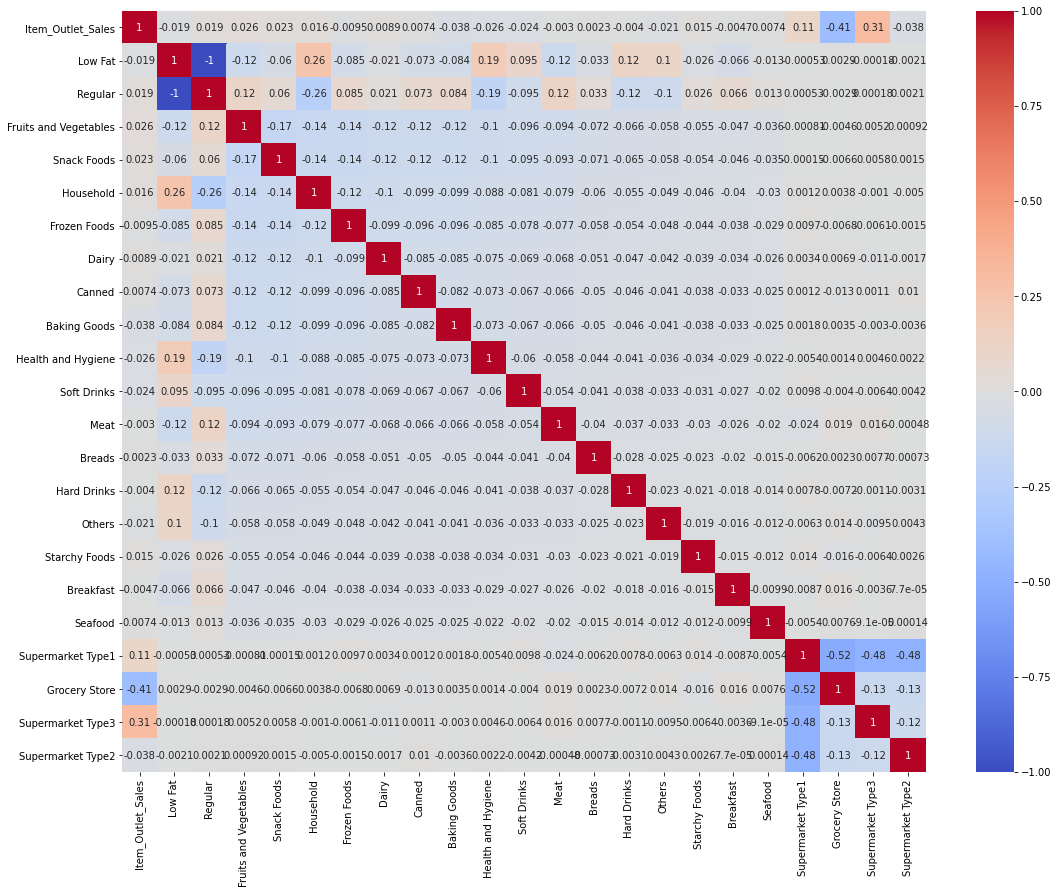

In [93]:
#making the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlate_df2 = df2.corr()

plt.figure(figsize = (18,14))
sns.heatmap(correlate_df2, annot = True, cmap="coolwarm");

**--> Per the heat map and correlation table, there seems to be a weak correlation to barely moderate correlation between Outlet_Type and Item_Outlet_Sales (0.31 for Supermarket Type3 and -0.41 Grocery Store). The other features I tested in Attempt #2 doesn't seem to have a correlation.**